<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Time_use_shares_with_vaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Feb 23 13:08:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from tensorflow.keras import backend as K   # Use tensorflow.keras
K.clear_session()

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow import set_random_seed

from numpy.random import seed

import numpy as np

In [0]:
epochs = 1200
batch_size = 128   

In [5]:
import pandas as pd 
df=pd.read_csv("https://github.com/yaniv256/VAEs-in-Economics/blob/master/Data/Timeuse/time_shares_only_2013.csv?raw=true")
df

Sleeping  ...  Public_health_activities
0           540  ...                         0
1           580  ...                         0
2           450  ...                         0
3           450  ...                         0
4           570  ...                         0
...         ...  ...                       ...
11380       450  ...                         0
11381       455  ...                         0
11382       645  ...                         0
11383       510  ...                         0
11384       385  ...                         0

[11385 rows x 389 columns]

In [6]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
qt = pd.DataFrame(qt_trans.fit_transform(df))
qt.columns = df.columns
qt

Sleeping  ...  Public_health_activities
0      0.571572  ...                       0.0
1      0.693193  ...                       0.0
2      0.262262  ...                       0.0
3      0.262262  ...                       0.0
4      0.663163  ...                       0.0
...         ...  ...                       ...
11380  0.262262  ...                       0.0
11381  0.287287  ...                       0.0
11382  0.836837  ...                       0.0
11383  0.466967  ...                       0.0
11384  0.109109  ...                       0.0

[11385 rows x 389 columns]

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(qt, test_size=0.33, random_state=42)
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [8]:
!rm -f vaes_net.py
!wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"


--2020-02-23 13:08:31--  https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10508 (10K) [text/plain]
Saving to: ‘vaes_net.py’

vaes_net.py         100%[===================>]  10.26K  --.-KB/s    in 0s      

2020-02-23 13:08:31 (145 MB/s) - ‘vaes_net.py’ saved [10508/10508]



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 390)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 389)]        0           input_1[0][0]                    
__________________________________________________________________________________________________
gaussian_noise (GaussianNoise)  (None, 389)          0           tf_op_layer_strided_slice_1[0][0]
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         800768      gaussian_noise[0][0]             
____

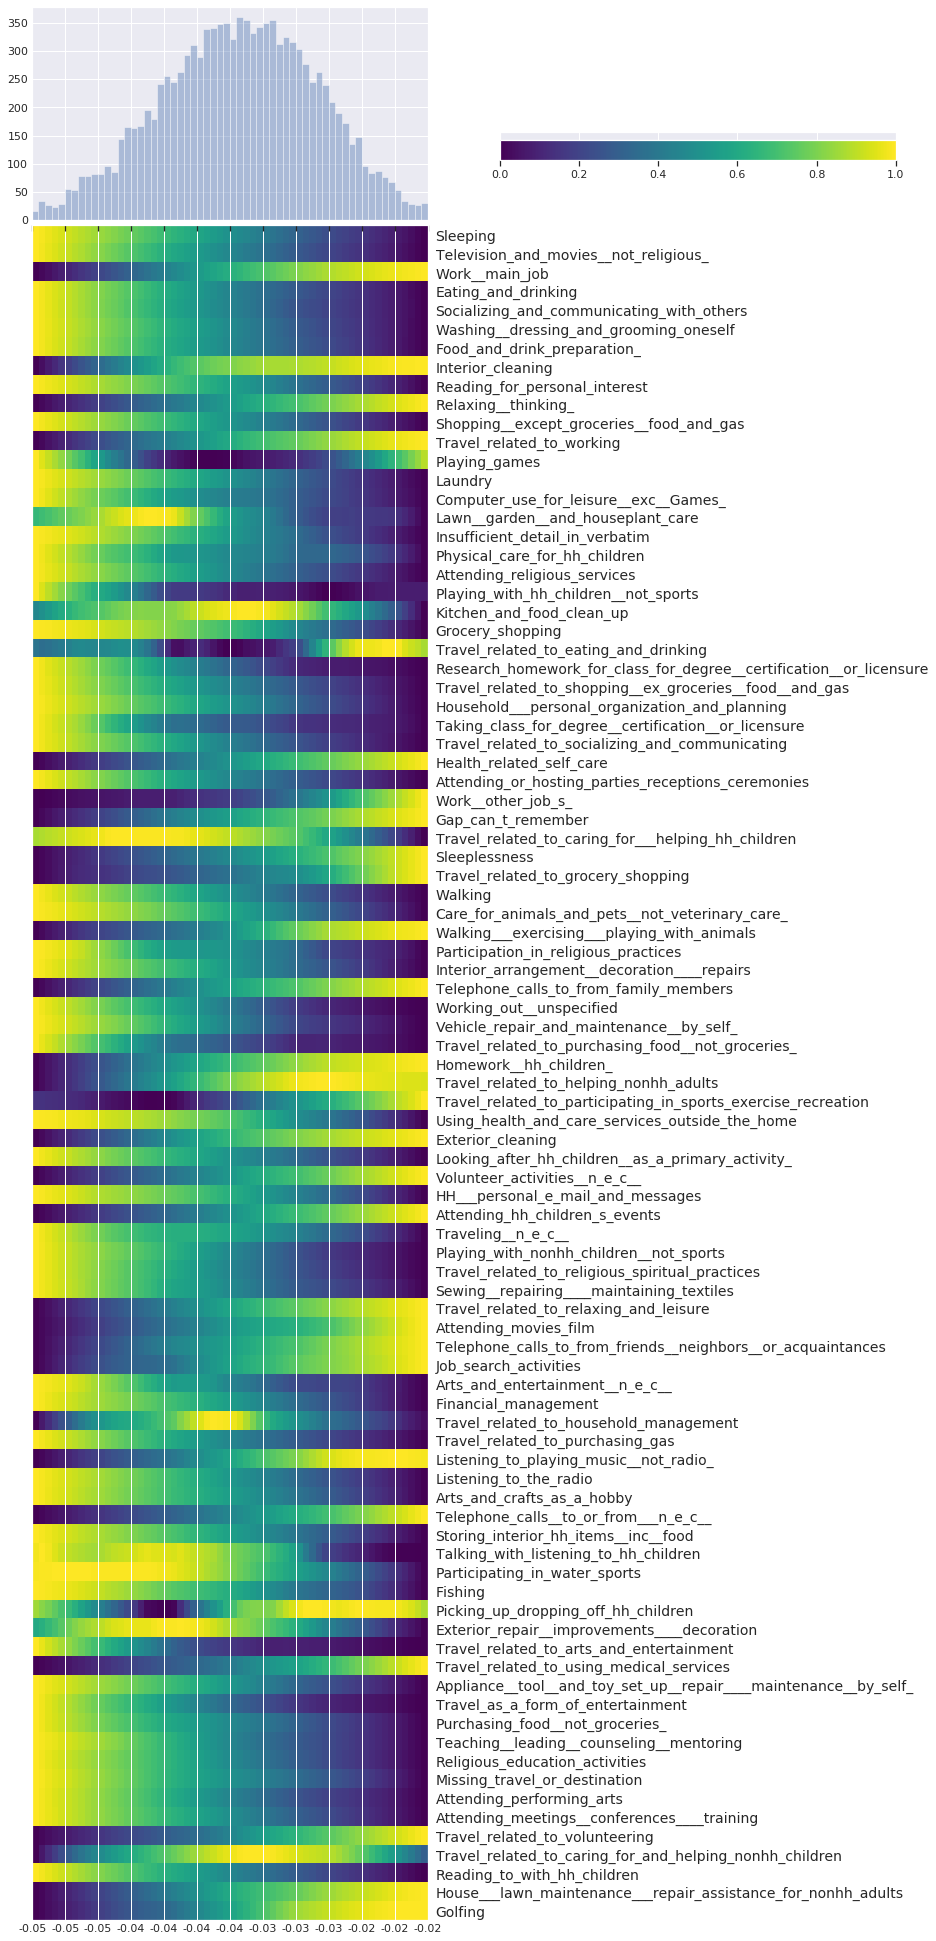

7627/7627 [==============================] - 6s 754us/sample - loss: 0.0170 - val_loss: 0.0159
Epoch 2/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0161 - val_loss: 0.0159
Epoch 3/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0160 - val_loss: 0.0160
Epoch 4/200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0159 - val_loss: 0.0161
Epoch 5/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0159 - val_loss: 0.0161
Epoch 6/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0158 - val_loss: 0.0152
Epoch 7/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0157 - val_loss: 0.0149
Epoch 8/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0155 - val_loss: 0.0146
Epoch 9/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0153 - val_loss: 0.0146
Epoch 10/200
7627/7627 [=========================

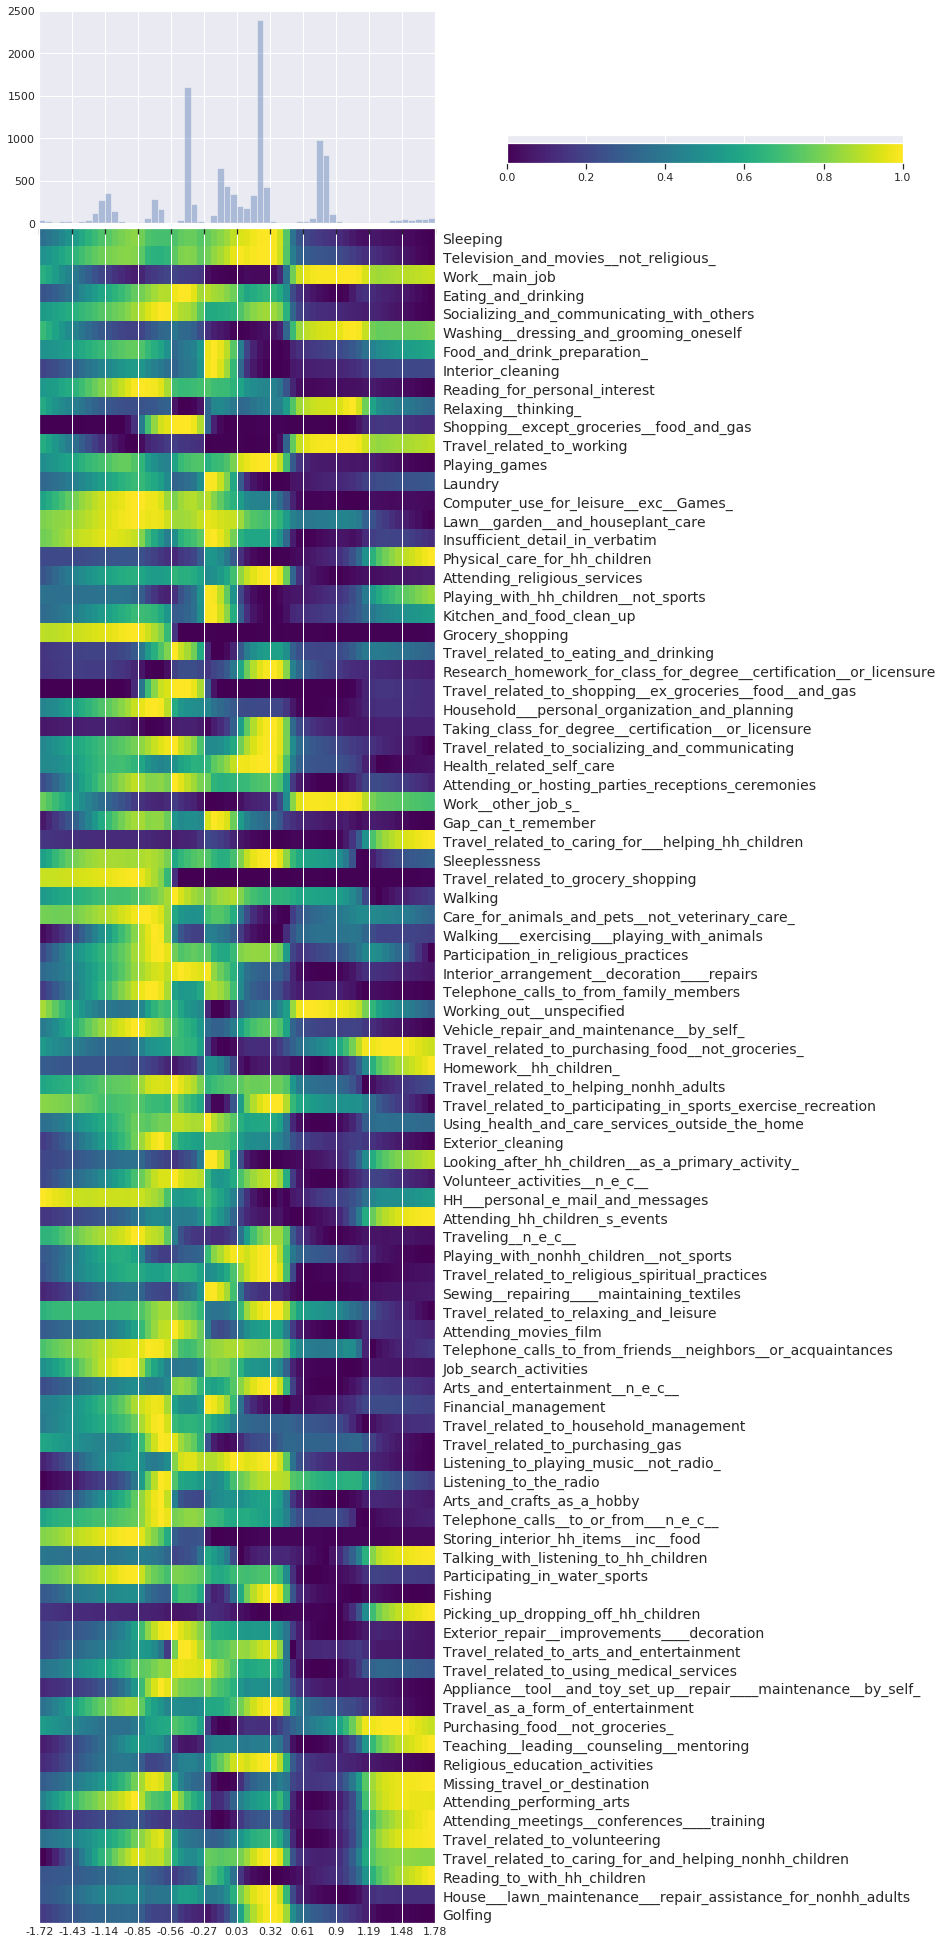

7627/7627 [==============================] - 4s 531us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 102/200
7627/7627 [==============================] - 1s 113us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 103/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 104/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 105/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 106/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 107/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 108/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 109/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 110/200
7627/7627 [========

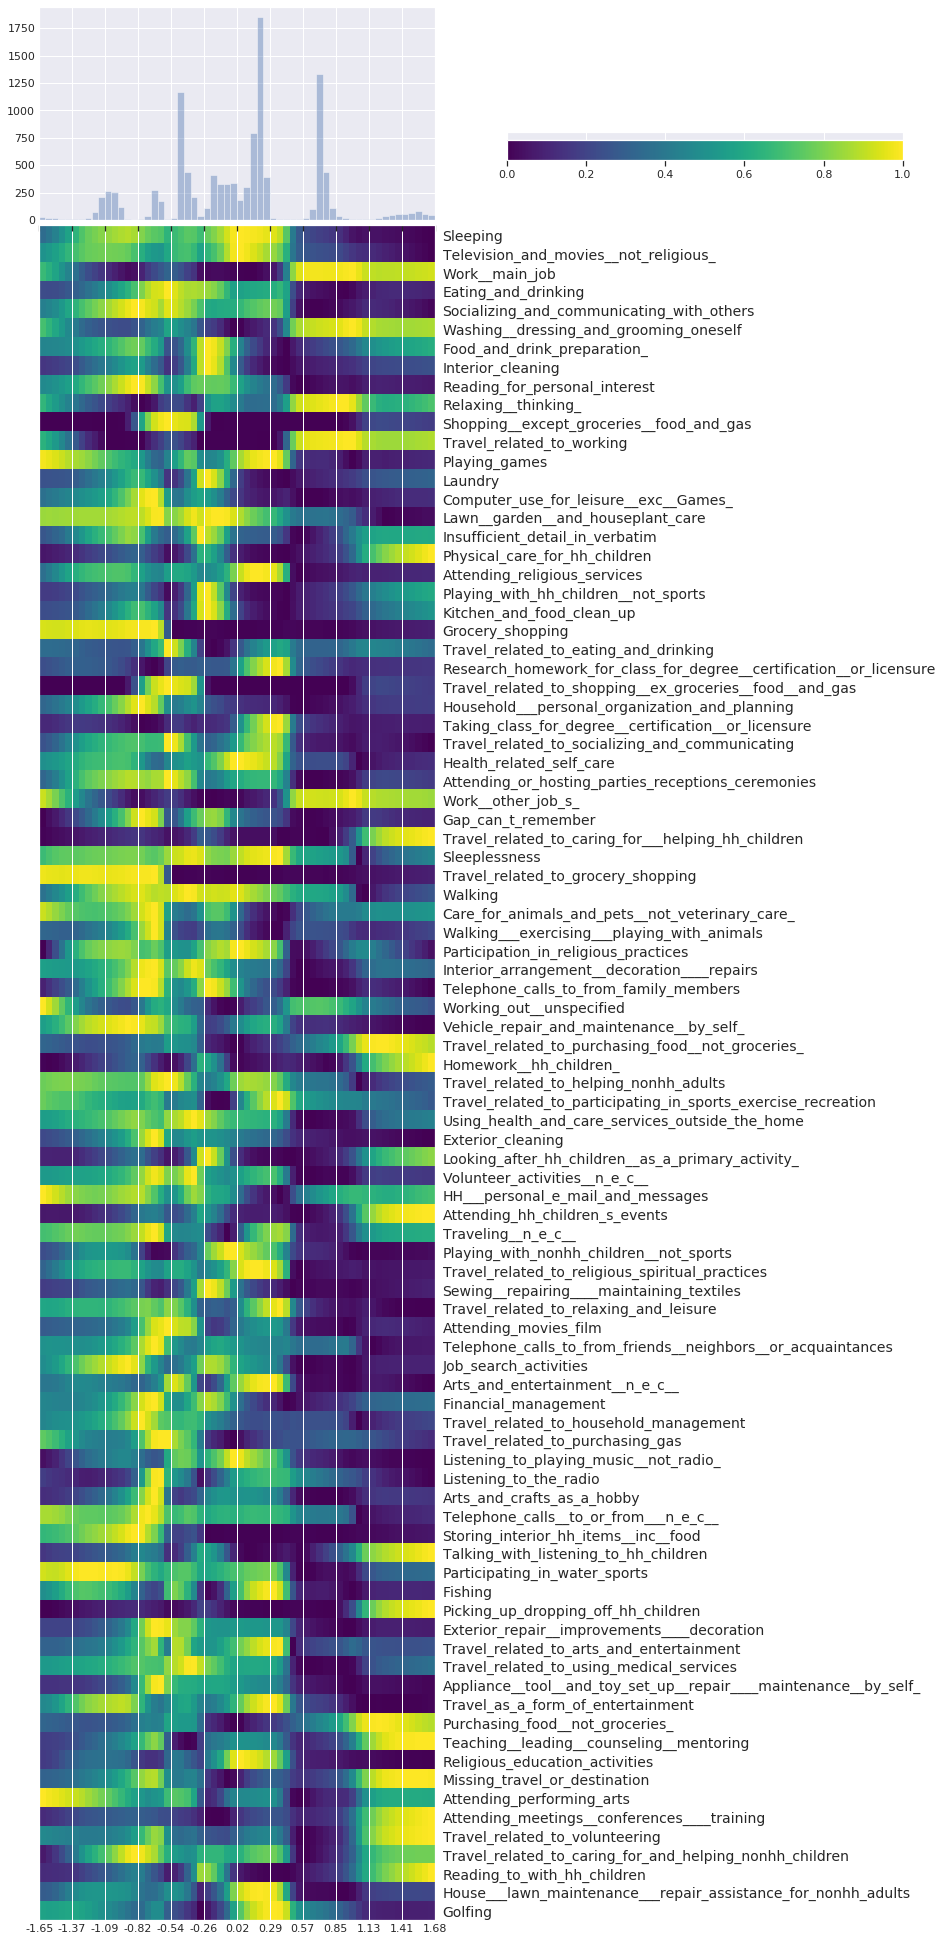

7627/7627 [==============================] - 4s 526us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 2/200
7627/7627 [==============================] - 1s 114us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 3/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 4/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 5/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 6/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 7/200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 8/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 9/200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0144 - val_loss: 0.0133
Epoch 10/200
7627/7627 [=========================

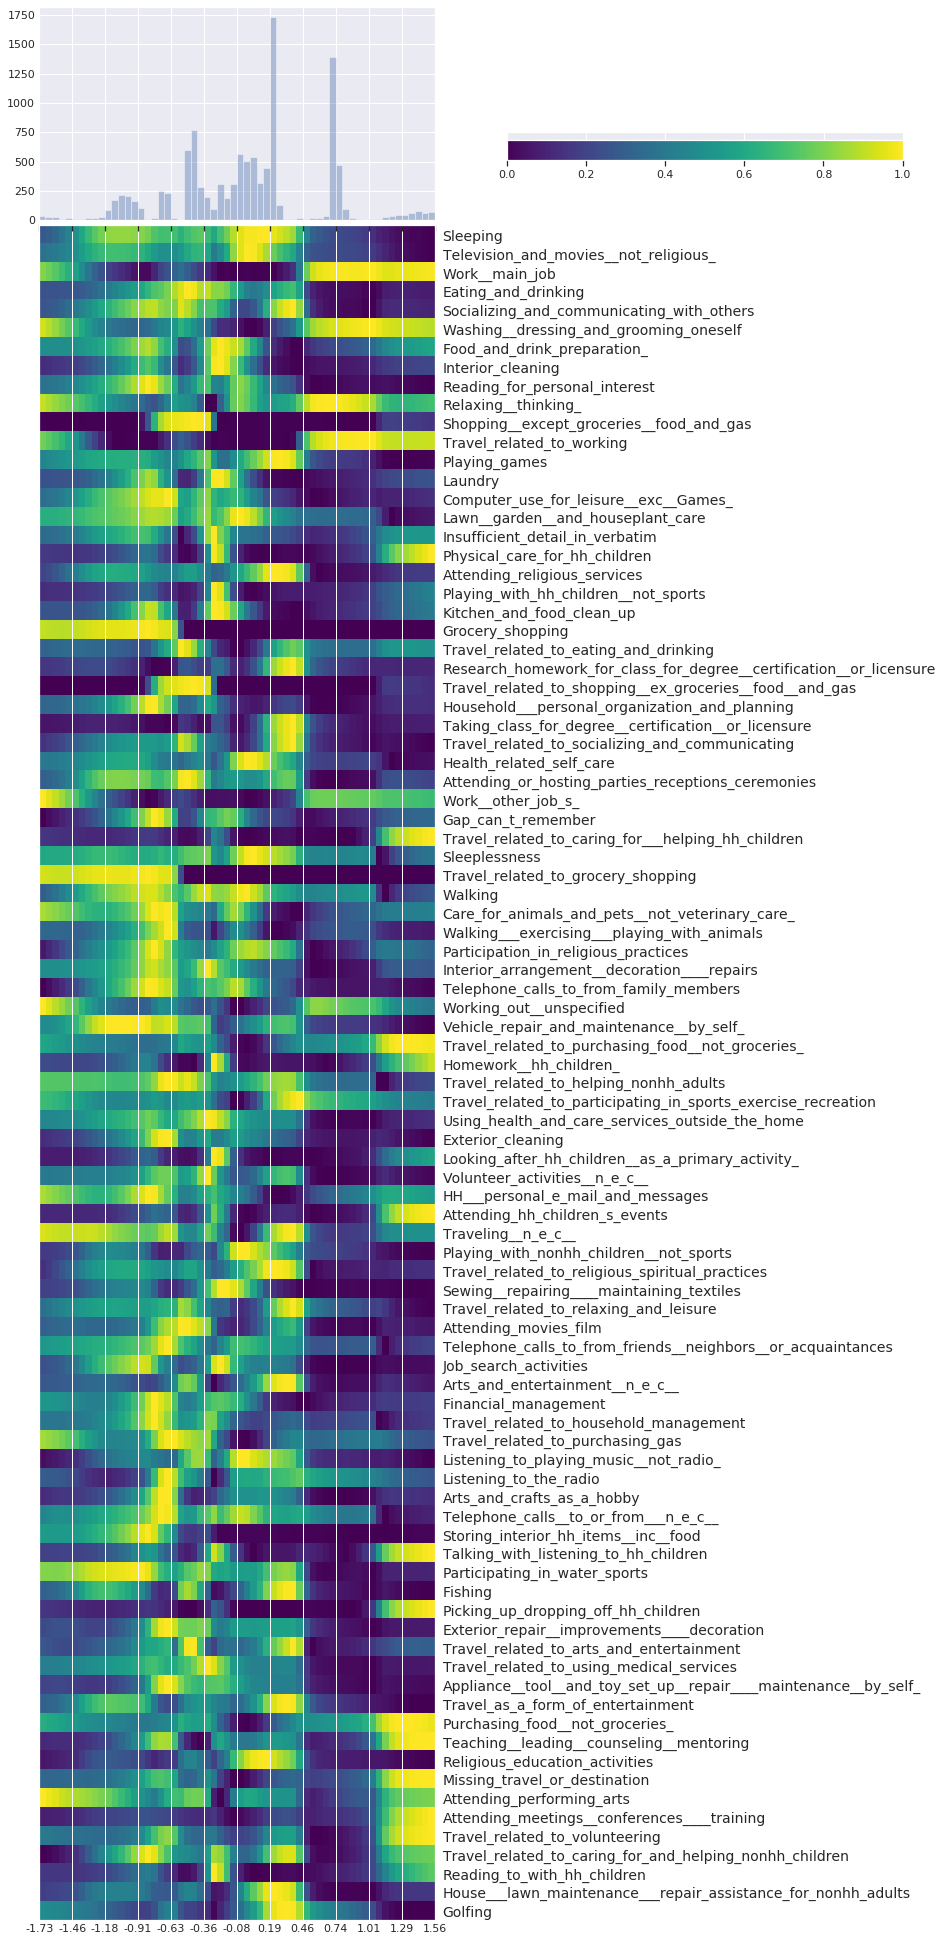

7627/7627 [==============================] - 4s 504us/sample - loss: 0.0144 - val_loss: 0.0132
Epoch 102/200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0143 - val_loss: 0.0132
Epoch 103/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0144 - val_loss: 0.0132
Epoch 104/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0144 - val_loss: 0.0132
Epoch 105/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0143 - val_loss: 0.0132
Epoch 106/200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0143 - val_loss: 0.0132
Epoch 107/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0143 - val_loss: 0.0132
Epoch 108/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0143 - val_loss: 0.0132
Epoch 109/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0143 - val_loss: 0.0131
Epoch 110/200
7627/7627 [========

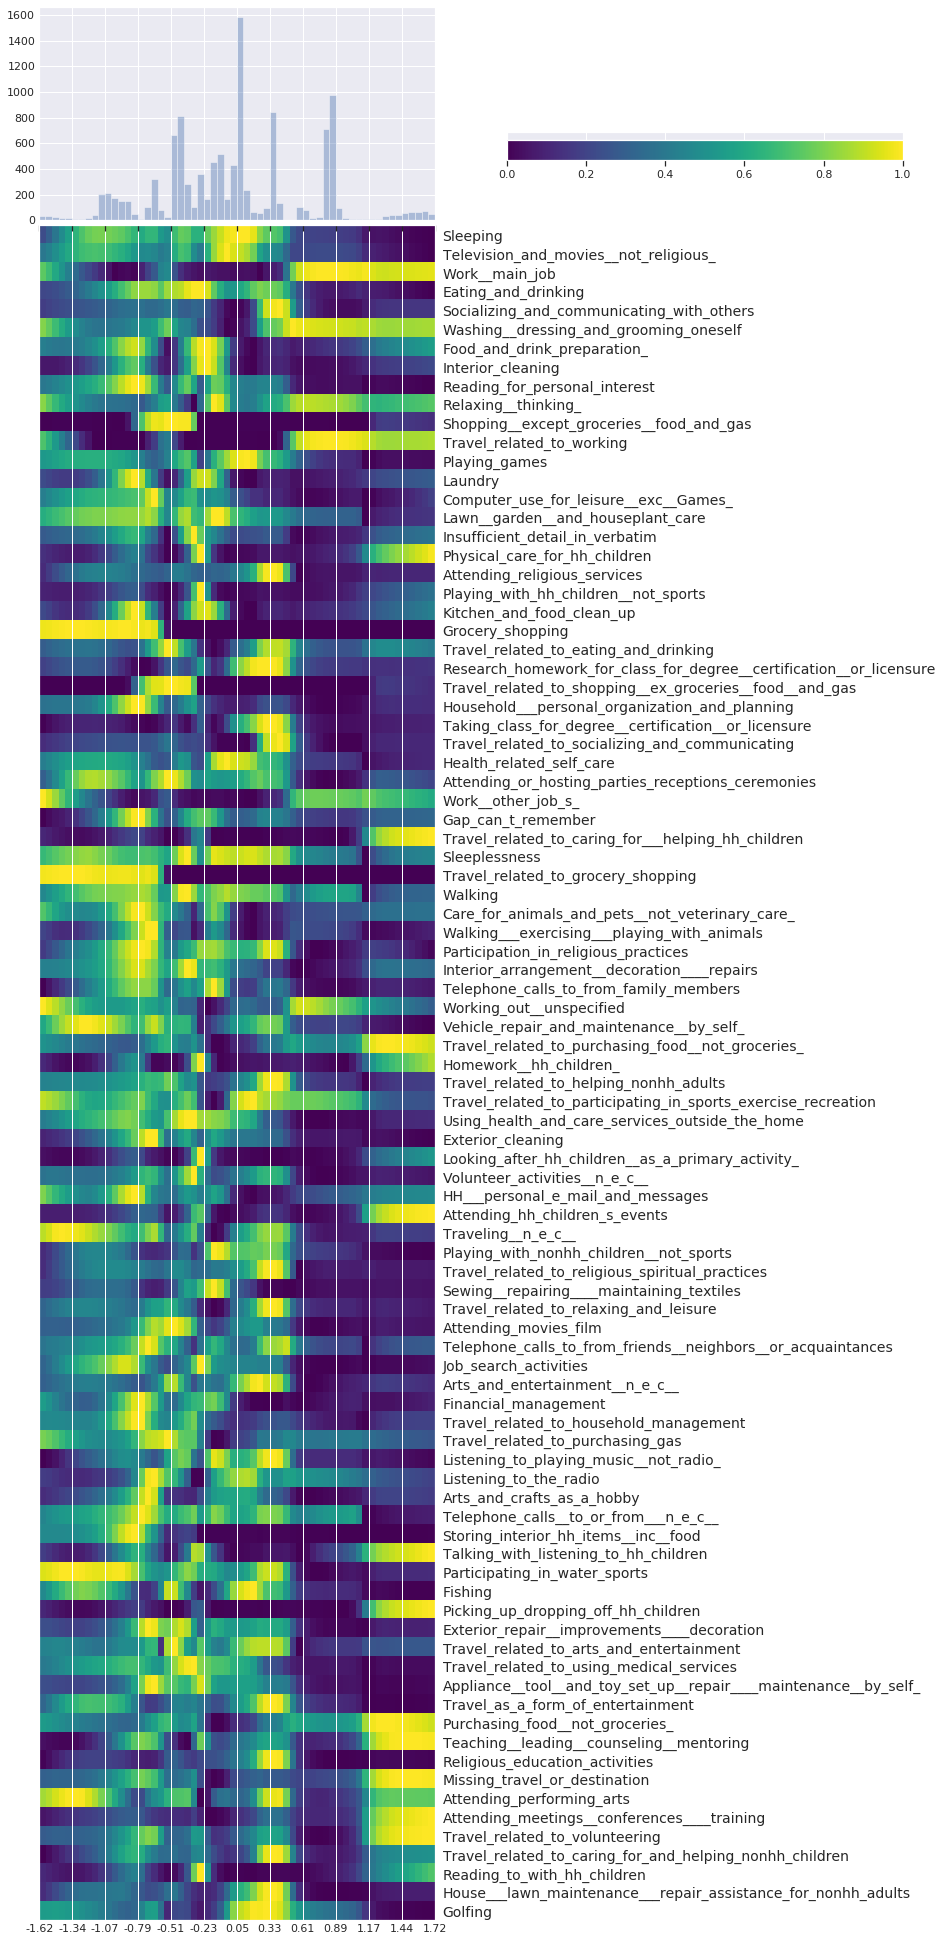

7627/7627 [==============================] - 4s 505us/sample - loss: 0.0142 - val_loss: 0.0130
Epoch 2/200
7627/7627 [==============================] - 1s 112us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 3/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 4/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 5/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 6/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 7/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 8/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 9/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0142 - val_loss: 0.0129
Epoch 10/200
7627/7627 [=========================

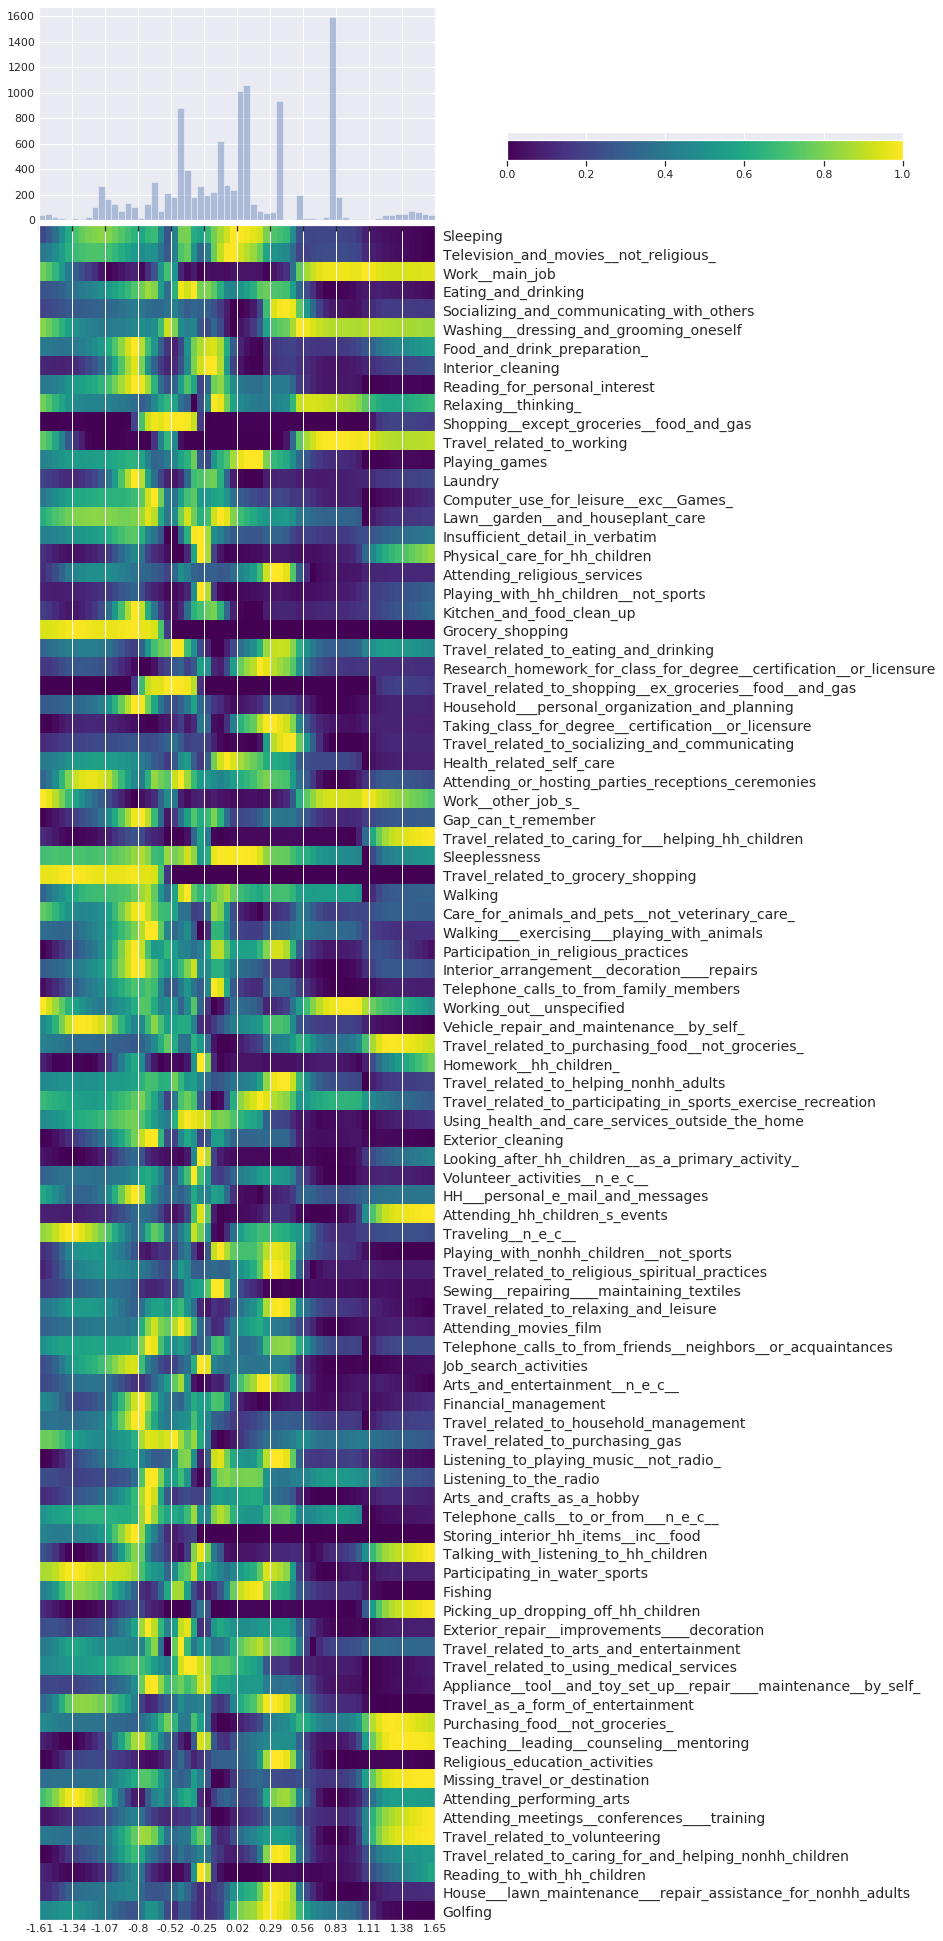

7627/7627 [==============================] - 4s 506us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 102/200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 103/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 104/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 105/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 106/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 107/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 108/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 109/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0129
Epoch 110/200
7627/7627 [========

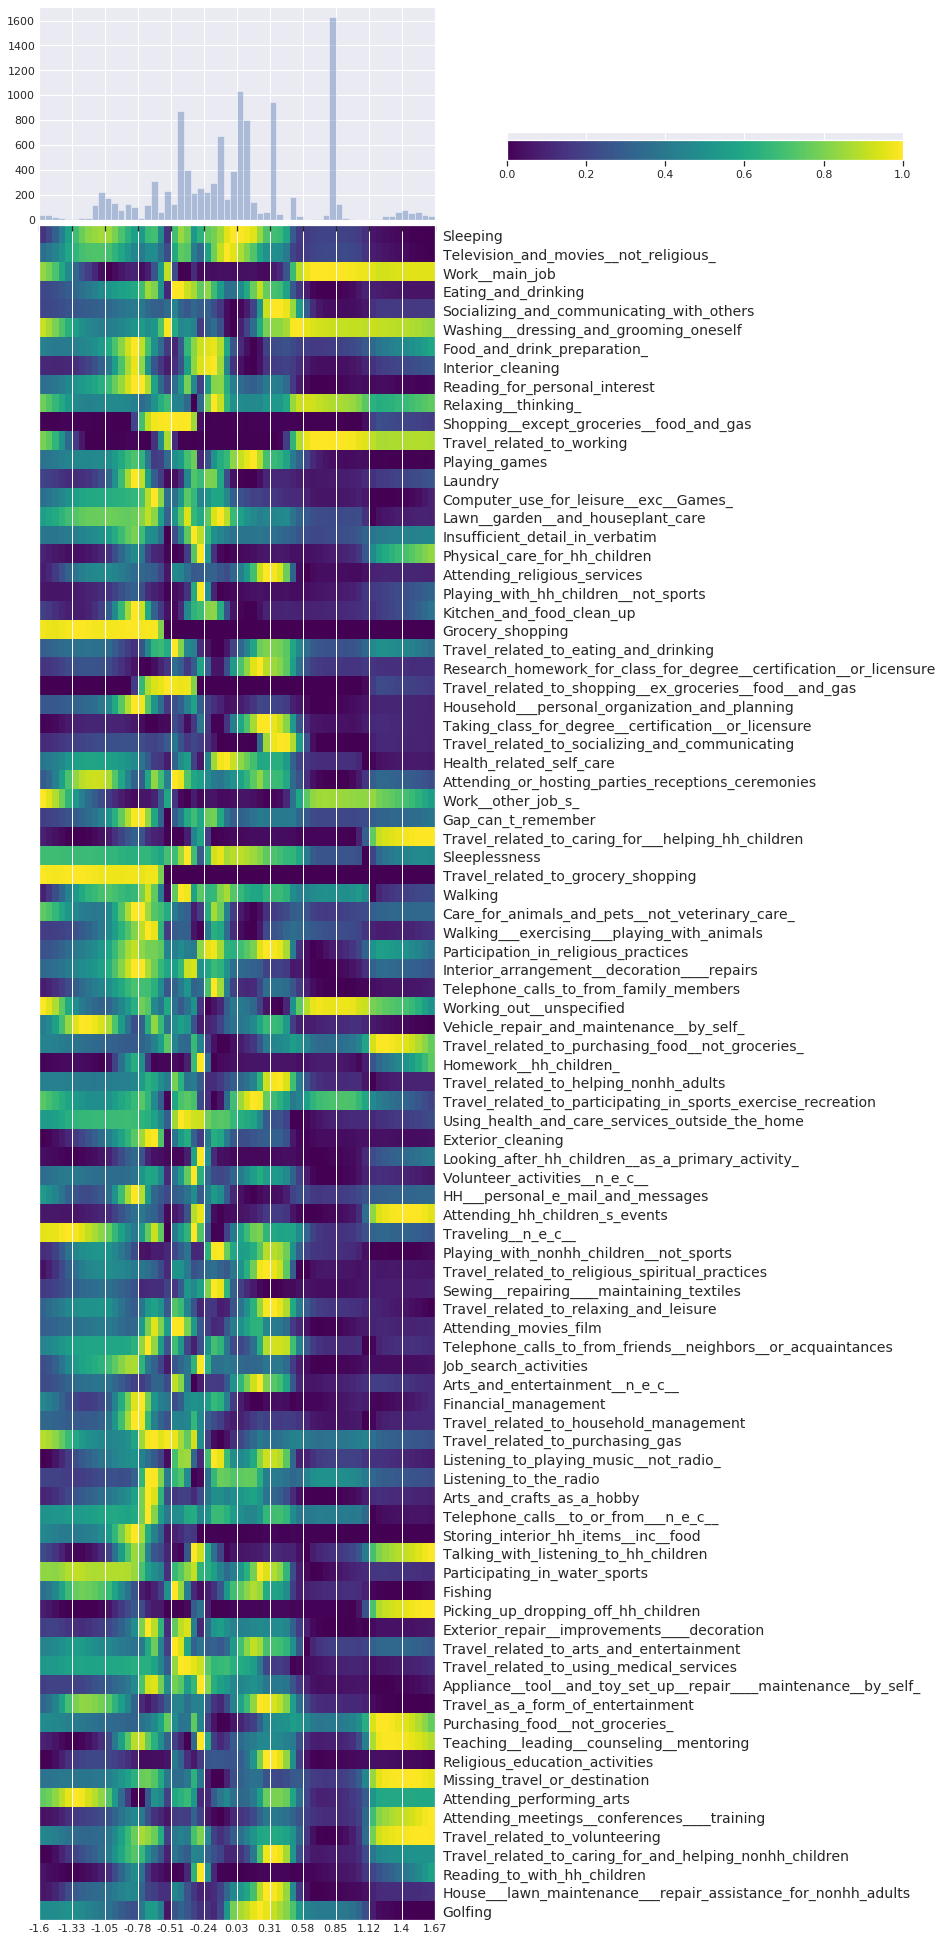

7627/7627 [==============================] - 4s 499us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 2/200
7627/7627 [==============================] - 1s 109us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 3/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 4/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 5/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 6/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0127
Epoch 7/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 8/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0141 - val_loss: 0.0127
Epoch 9/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0141 - val_loss: 0.0128
Epoch 10/200
7627/7627 [=========================

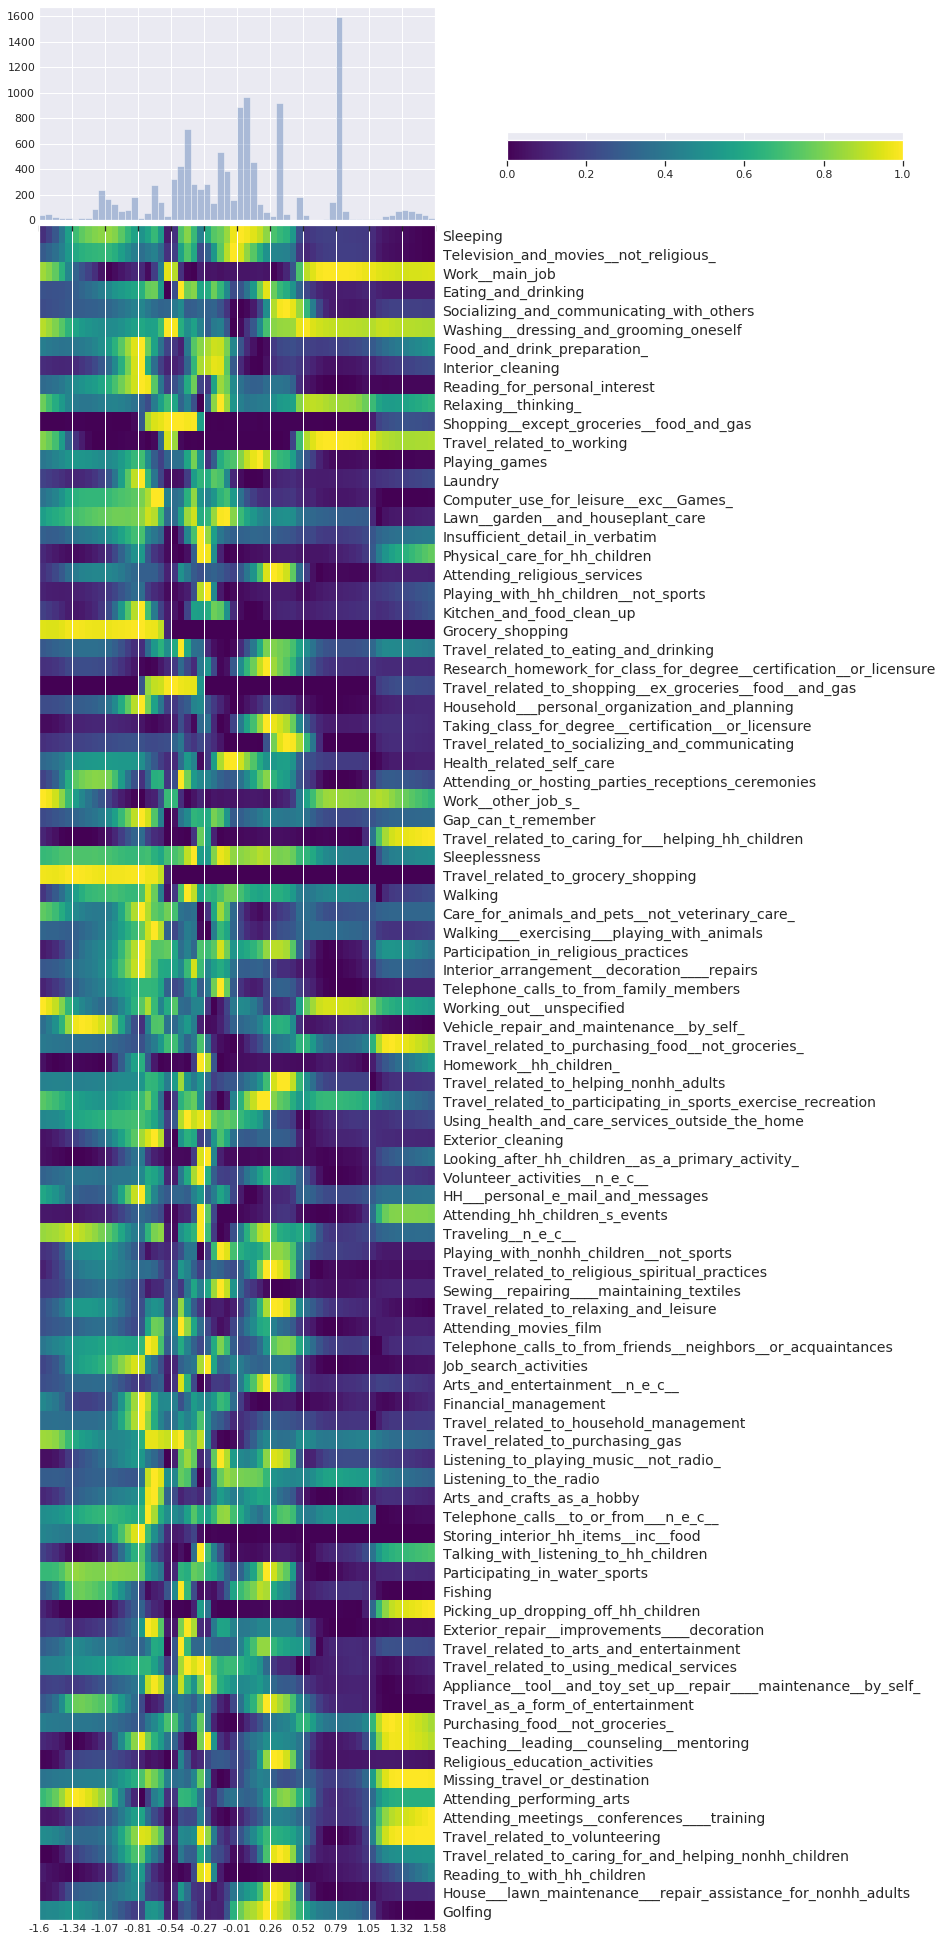

7627/7627 [==============================] - 4s 536us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 102/200
7627/7627 [==============================] - 1s 111us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 103/200
7627/7627 [==============================] - 1s 110us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 104/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 105/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 106/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0128
Epoch 107/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 108/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 109/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 110/200
7627/7627 [========

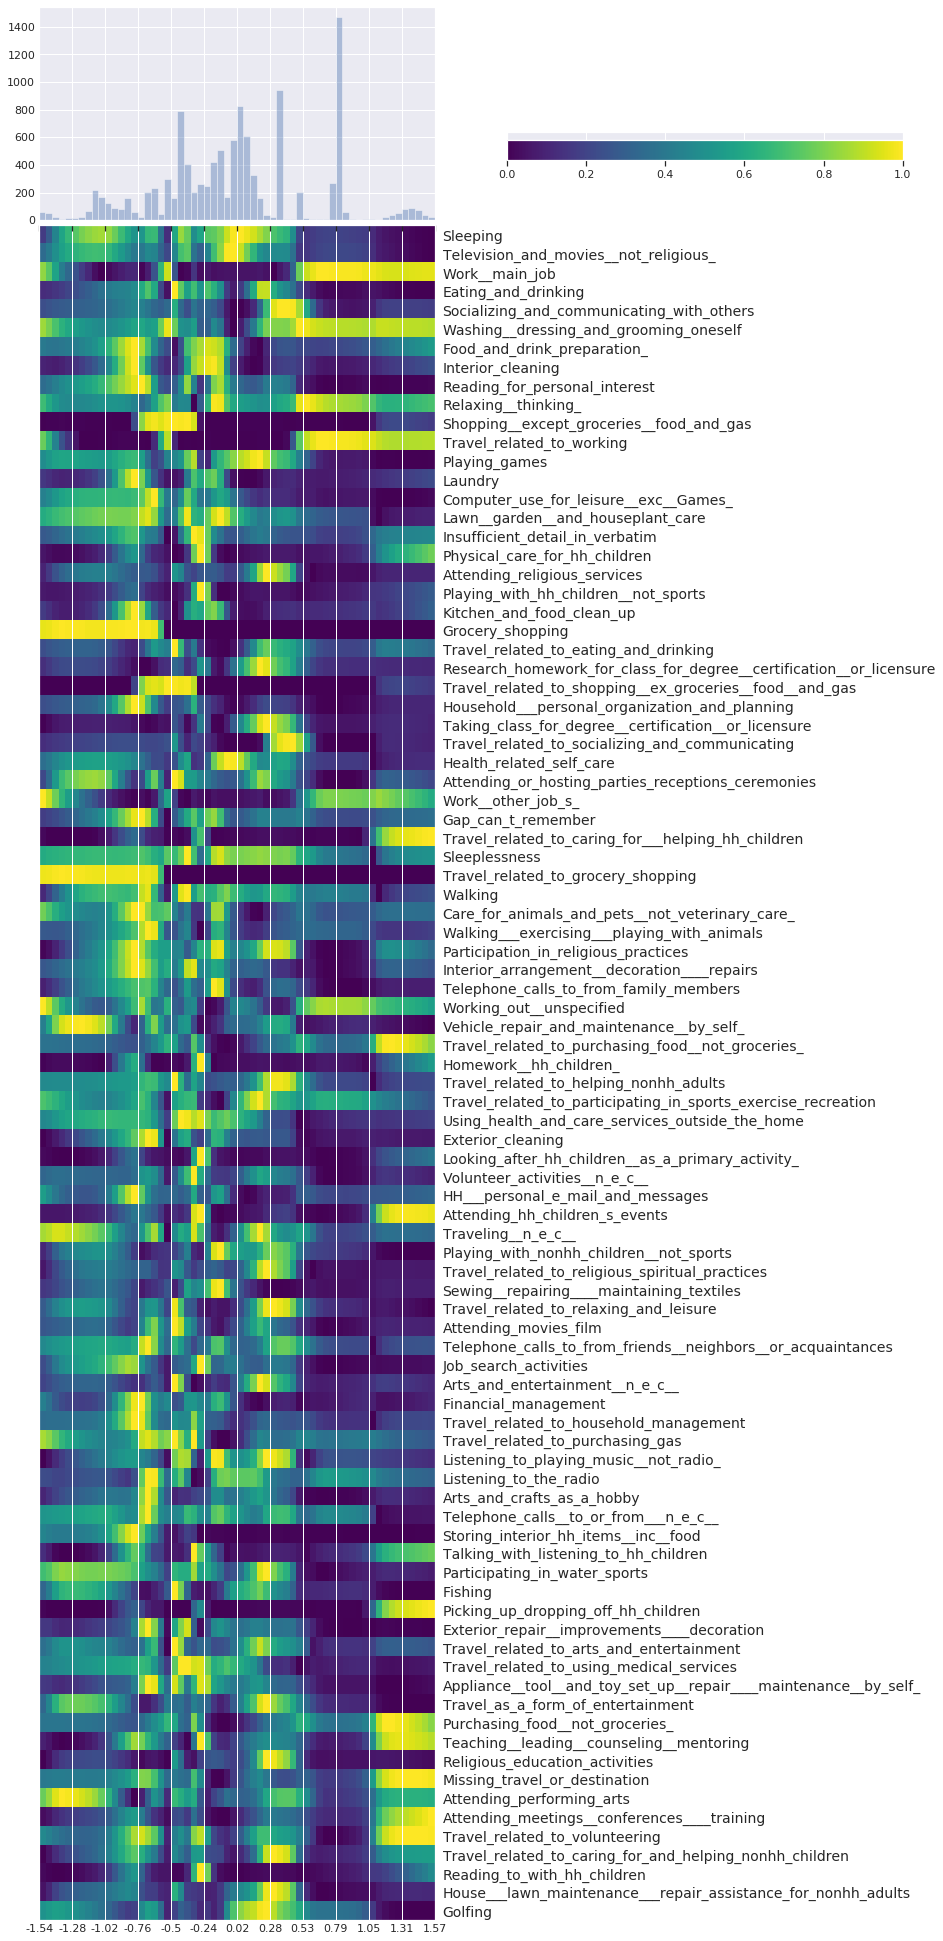

7627/7627 [==============================] - 4s 500us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 2/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 3/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 4/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 5/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 6/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 7/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 8/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 9/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 10/200
7627/7627 [=========================

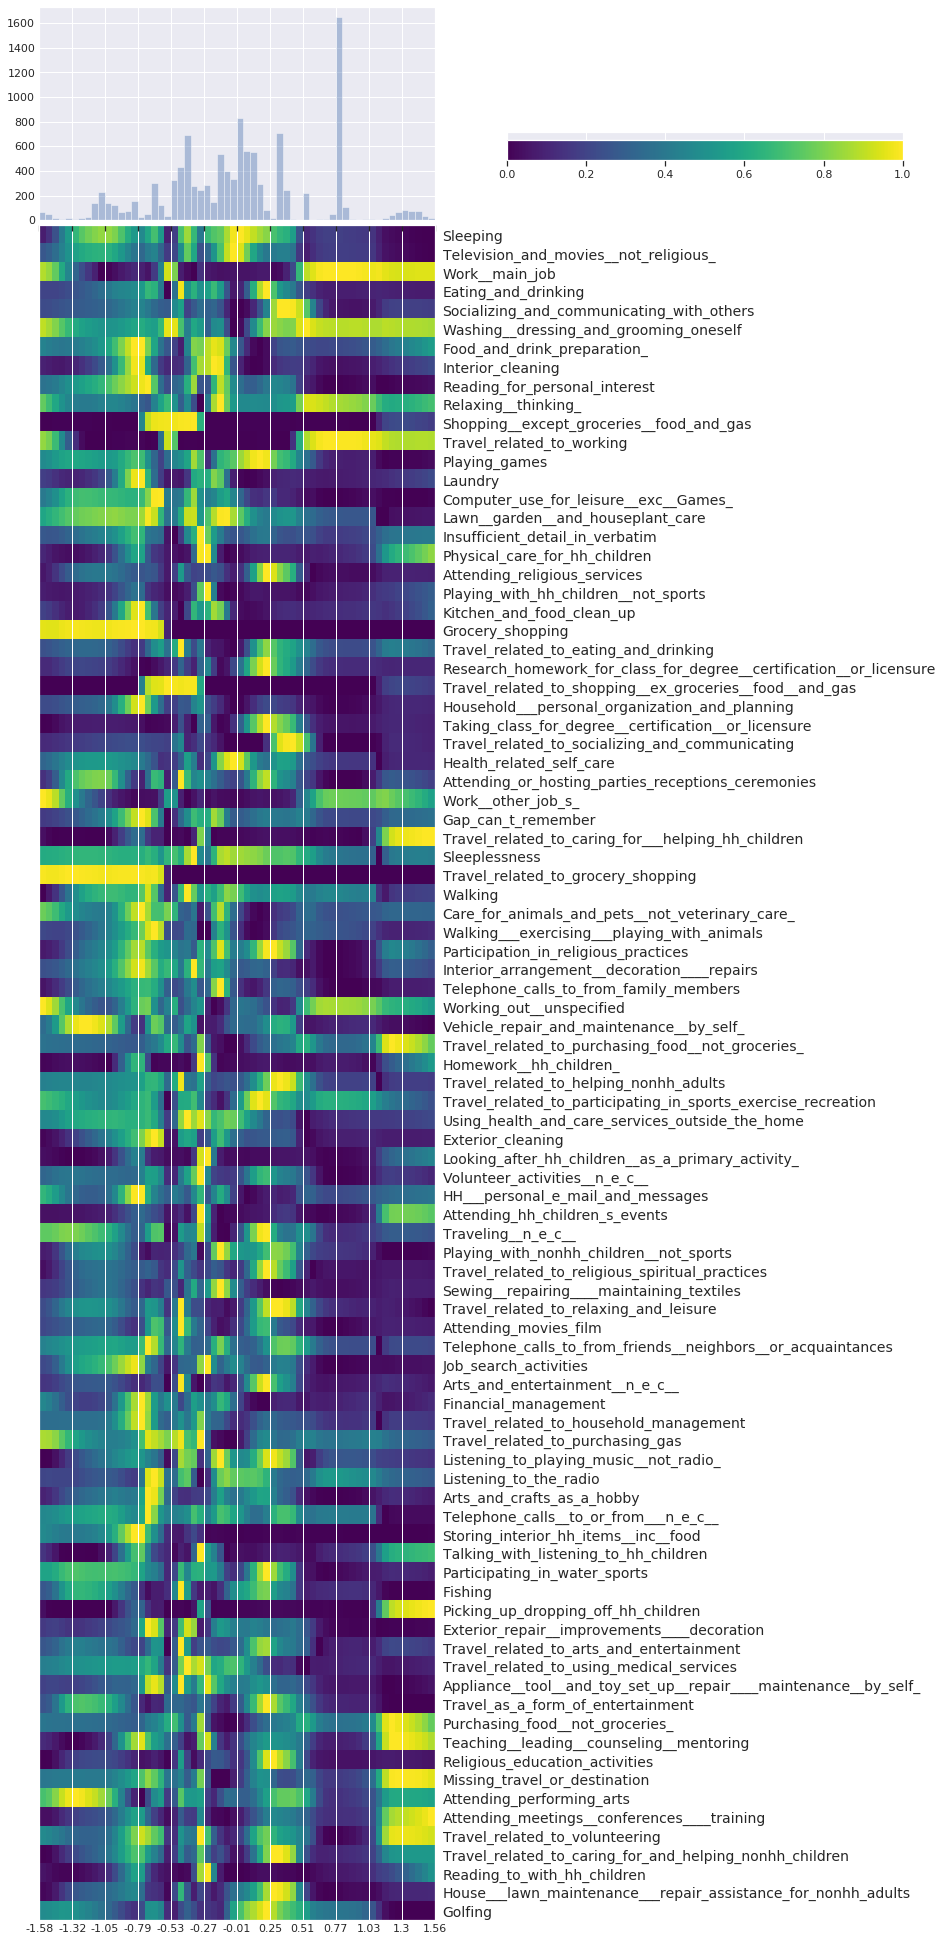

7627/7627 [==============================] - 4s 495us/sample - loss: 0.0139 - val_loss: 0.0126
Epoch 102/200
7627/7627 [==============================] - 1s 108us/sample - loss: 0.0140 - val_loss: 0.0126
Epoch 103/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0126
Epoch 104/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0126
Epoch 105/200
7627/7627 [==============================] - 1s 105us/sample - loss: 0.0140 - val_loss: 0.0126
Epoch 106/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0140 - val_loss: 0.0127
Epoch 107/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0139 - val_loss: 0.0126
Epoch 108/200
7627/7627 [==============================] - 1s 106us/sample - loss: 0.0139 - val_loss: 0.0126
Epoch 109/200
7627/7627 [==============================] - 1s 107us/sample - loss: 0.0139 - val_loss: 0.0126
Epoch 110/200
7627/7627 [========

In [9]:
from vaes_net import make_vae, callback_list, plot_types
seed(42)
set_random_seed(42)
vae = make_vae(full_data=qt,  
    img_shape = (389+1, ),
    latent_dim = 1, 
    dense_width = 2048,
    l2_penalty=0.00000000000001,
    l1_penalty=0.0,
    encoder_dropout_rate=0.5,
    decoder_dropout_rate=0.5,
    entanglement_penalty = 2,
    hidden_n = 3)  

vae.summary()

for i in range(1,6):

  fitted = vae.fit(
      x=x_train, 
      y=None,
      shuffle=True,
      epochs=round(epochs/6),
      batch_size=batch_size,
      validation_data=(x_test, None),
      callbacks = callback_list
      )

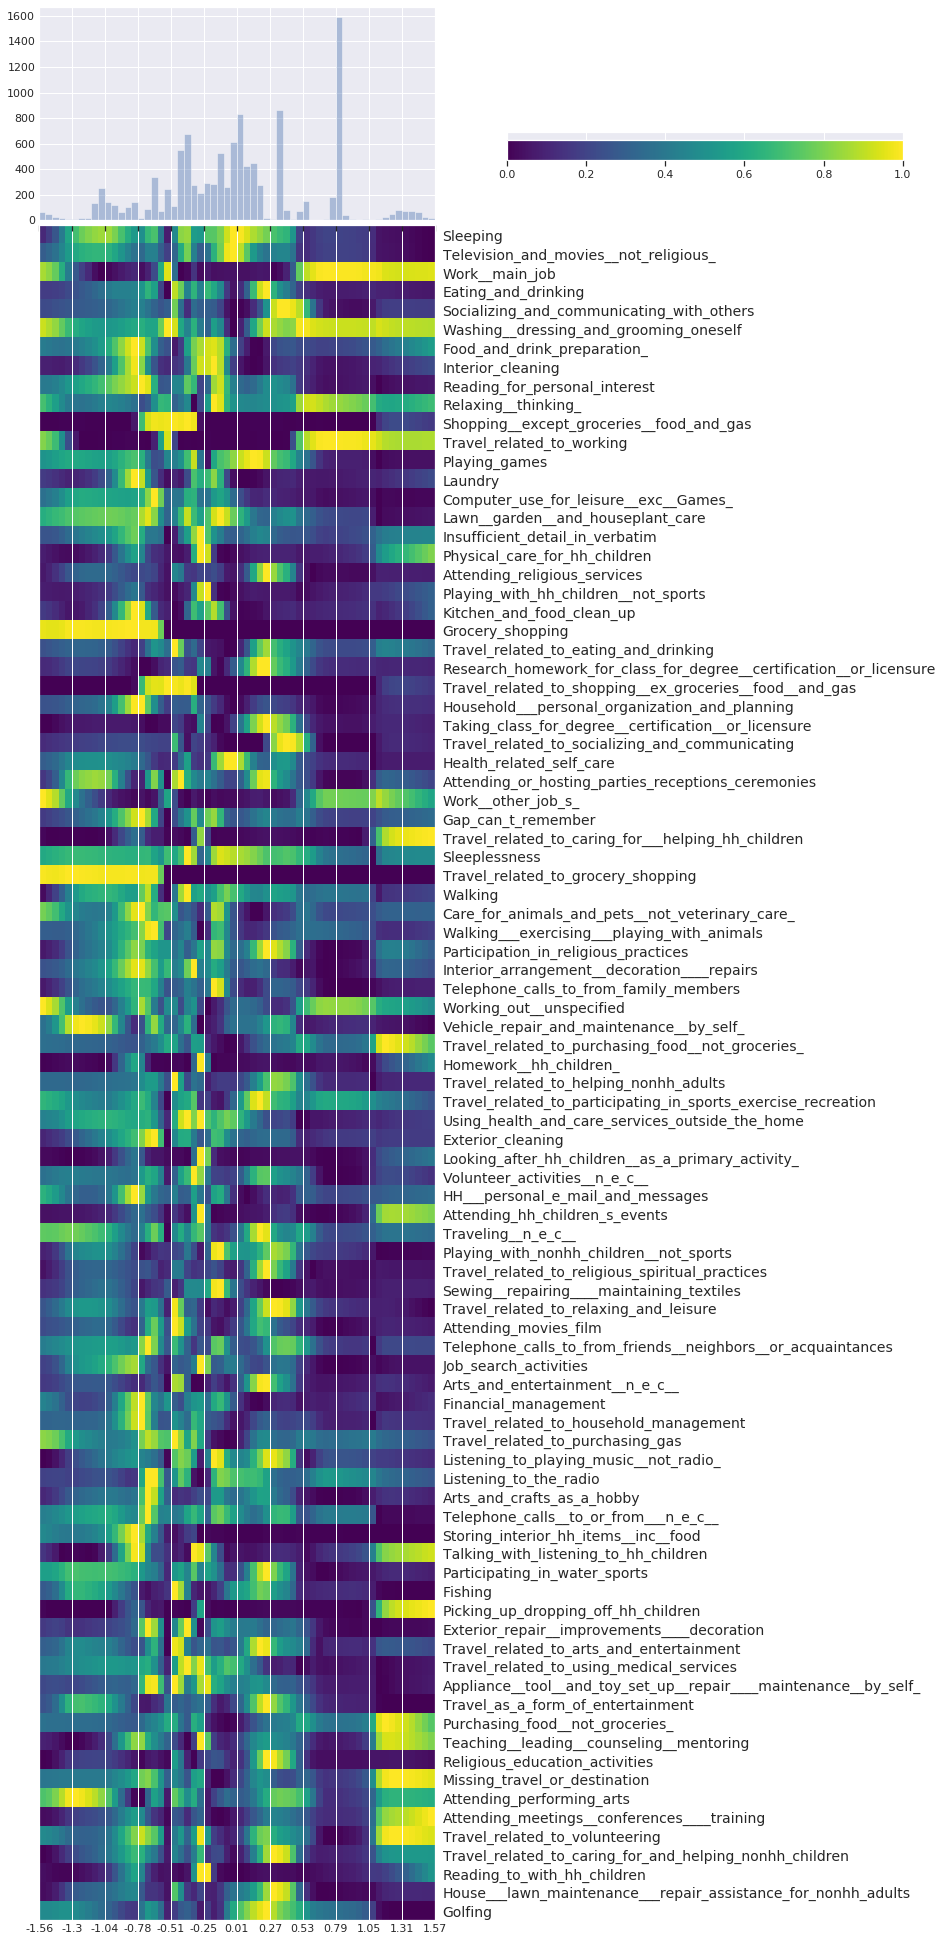

In [10]:
plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt);

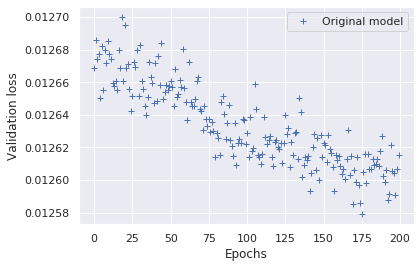

In [16]:

val_loss1 = fitted.history['val_loss']
#val_loss2 = fitted2.history['val_loss']
epochs_grid = range(0, np.shape(val_loss1)[0])

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs_grid, val_loss1, 'b+', label='Original model')
# "bo" is for "blue dot"
#plt.plot(epochs_grid, val_loss2, 'bo', label='Alternative model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

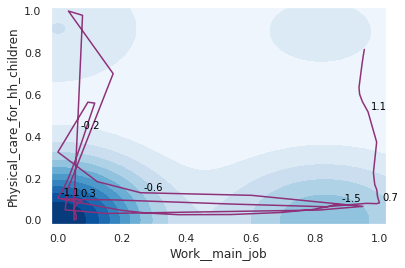

In [17]:
from vaes_net import encode_plot2d
  
encode_plot2d(encoder=vae.encoder,decoder=vae.decoder, 
              data=vae.full_data)

In [18]:

flag_1 = np.ones((qt.shape[0],1),dtype=qt.values.dtype)
data = np.concatenate((qt.values,flag_1),axis=-1)
encoded_data=vae.encoder.predict(data)
pd.DataFrame(encoded_data)

0
0      0.046988
1     -0.830193
2     -0.971887
3      0.798438
4     -0.015059
...         ...
11380 -0.010488
11381  0.763695
11382  0.761829
11383  0.151786
11384 -0.223166

[11385 rows x 1 columns]

In [19]:
from sklearn.preprocessing import MinMaxScaler

filtered=pd.DataFrame((vae.decoder.predict(encoded_data)))
scaler = MinMaxScaler()
filtered=pd.DataFrame(scaler.fit_transform(filtered))  
filtered.columns = df.columns
filtered

Sleeping  ...  Public_health_activities
0      0.982270  ...                  0.046405
1      0.655219  ...                  0.184963
2      0.850035  ...                  0.155306
3      0.342773  ...                  0.197341
4      0.998380  ...                  0.055824
...         ...  ...                       ...
11380  0.999309  ...                  0.053133
11381  0.344213  ...                  0.195721
11382  0.344258  ...                  0.195625
11383  0.883373  ...                  0.092287
11384  0.786115  ...                  0.232878

[11385 rows x 389 columns]

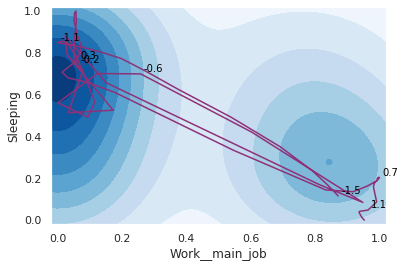

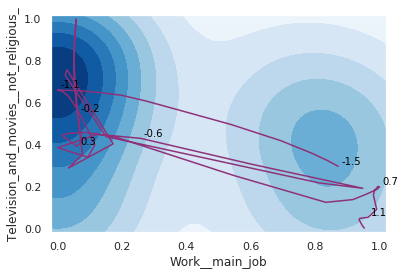

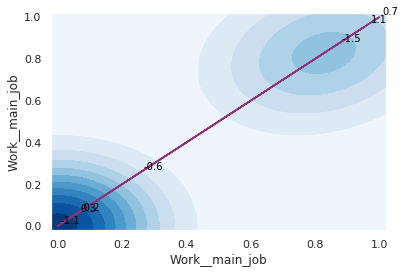

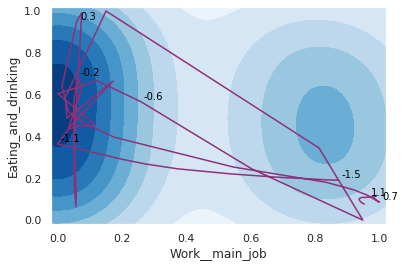

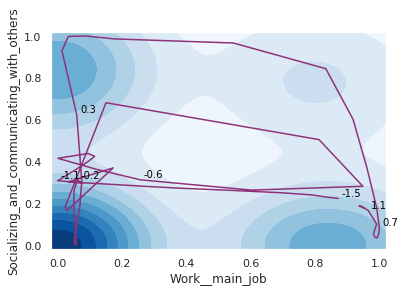

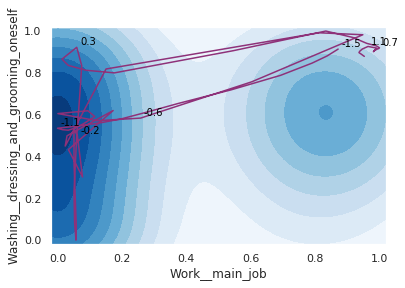

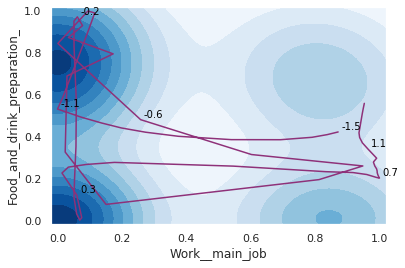

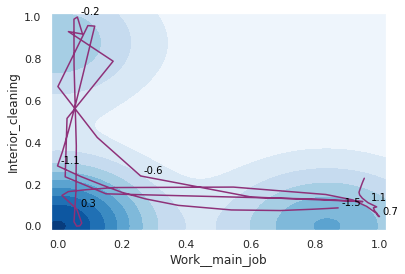

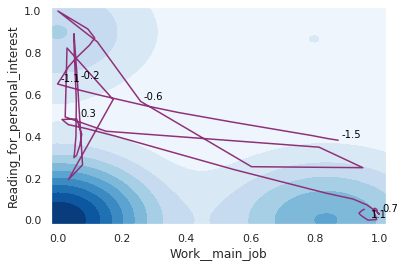

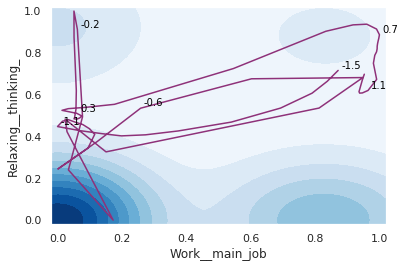

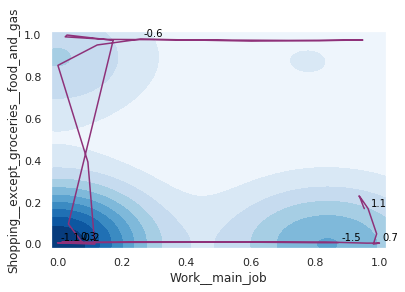

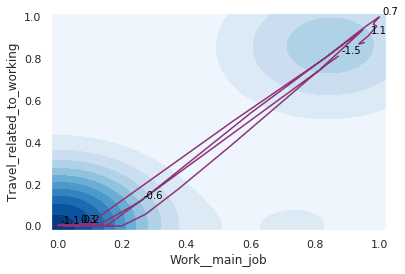

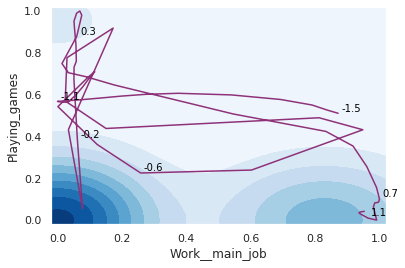

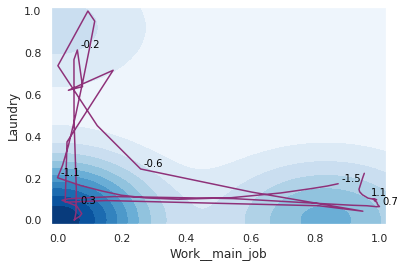

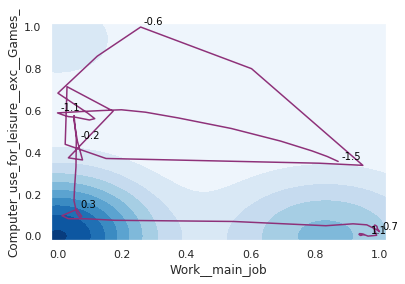

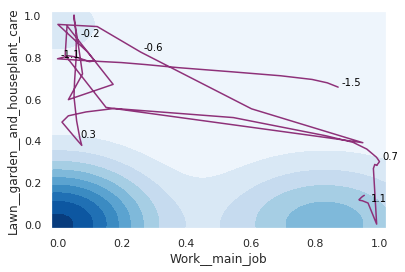

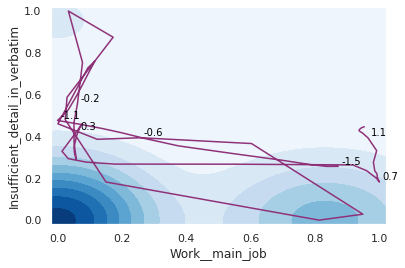

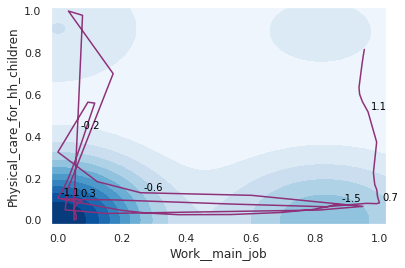

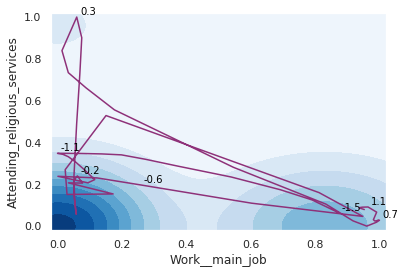

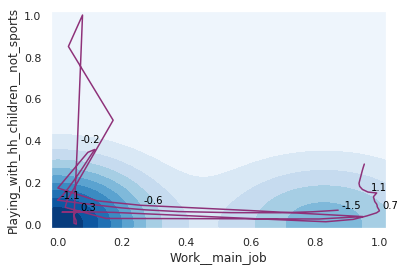

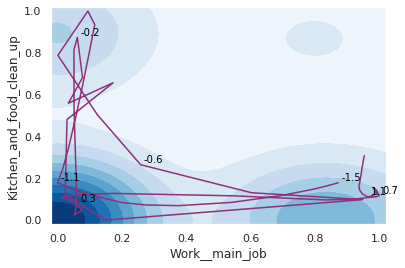

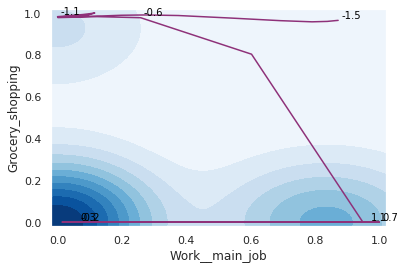

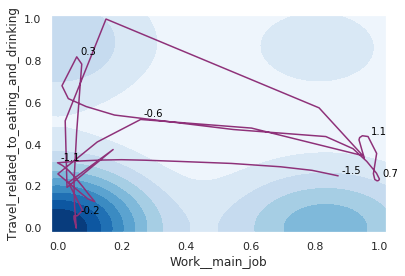

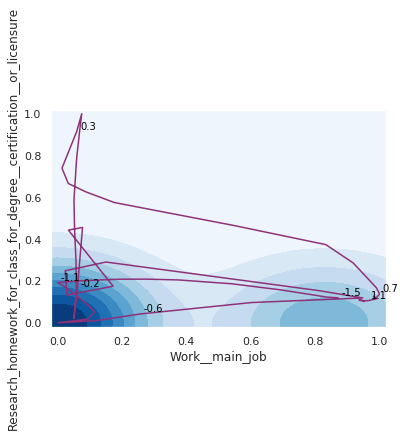

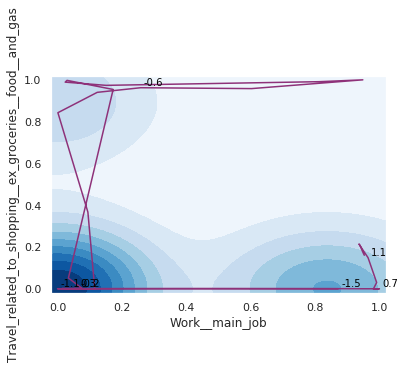

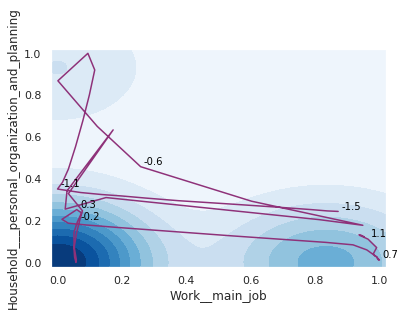

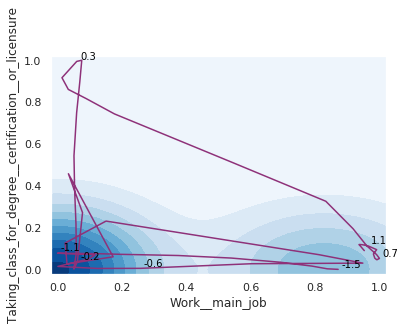

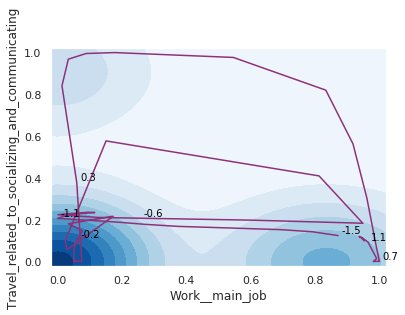

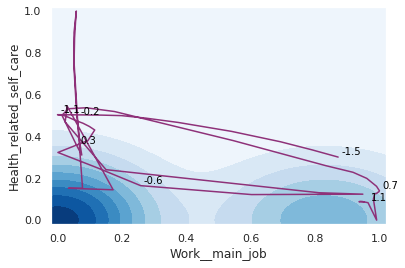

In [20]:
for field in filtered.columns[0:29]:
    
     encode_plot2d(vae.encoder,vae.decoder, qt, y_col=field)

In [21]:
filtered-qt

Sleeping  ...  Public_health_activities
0      0.410699  ...                  0.046405
1     -0.037974  ...                  0.184963
2      0.587773  ...                  0.155306
3      0.080510  ...                  0.197341
4      0.335216  ...                  0.055824
...         ...  ...                       ...
11380  0.737047  ...                  0.053133
11381  0.056926  ...                  0.195721
11382 -0.492579  ...                  0.195625
11383  0.416406  ...                  0.092287
11384  0.677006  ...                  0.232878

[11385 rows x 389 columns]

In [0]:
pd.DataFrame(encoded_data).to_csv("encoded_data.csv", header=False, index=False)


In [0]:
vae.encoder.save_weights('encoder')

In [0]:
vae.decoder.save_weights('decoder')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!ls "/content/drive/My Drive/VAEs-in-Economics/Resources"

decoder.data-00000-of-00002
decoder.data-00001-of-00002
decoder.index
encoded_data.csv
encoder.data-00000-of-00002
encoder.data-00001-of-00002
encoder.index
EqualSizedBins.png
PaintedStones.png
type_plot.png
VAE.png
VAE.pptx
Work__main_job_Attending_religious_services.png
Work__main_job_Computer_use_for_leisure__exc__Games_.png
Work__main_job_Eating_and_drinking.png
Work__main_job_Food_and_drink_preparation_.png
Work__main_job_Grocery_shopping.png
Work__main_job_Health_related_self_care.png
Work__main_job_Household___personal_organization_and_planning.png
Work__main_job_Insufficient_detail_in_verbatim.png
Work__main_job_Interior_cleaning.png
Work__main_job_Kitchen_and_food_clean_up.png
Work__main_job_Laundry.png
Work__main_job_Lawn__garden__and_houseplant_care.png
Work__main_job_Physical_care_for_hh_children.png
Work__main_job_Playing_games.png
Work__main_job_Playing_with_hh_children__not_sports.png
Work__main_job_Reading_for_personal_interest.png
Work__main_job_Relaxing__thinking_.png

In [0]:
!cp *.png "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp *.csv "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp encoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp decoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"